In [46]:
# YellowstoneWolves_MS.csv
# YellowstoneWolves_PI.csv
# YellowstoneWolves_U.csv

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings # supress warnings
warnings.filterwarnings('ignore')


In [47]:
# import Housing.csv
df = pd.read_csv('YellowstoneWolves_U.csv')
df

,sort,Name,Sex,Color,Birth Year,Birth Month/Day,Birth Pack,Mother,Father,Birth Location,...,Last seen,Death/Last Month/Day,Death Cause,Death/Last Location,Alt name,Translocated,on 2023 Wolf Chart?,Official Tree?,Book?,notes
0,2,2,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,December,Wolf,"Blacktail Deer Plateau, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
1,3,3,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,February 5,Legally Shot,"Emigrant, MT",NaN,Petite Lake,NaN,Yes,Yes,NaN
2,4,4,M,b,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,NaN,May 21,Wolf (Druid Peak),"Soda Butte Canyon, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
3,5,5,F,g,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,2000,Unknown,NaN,Unknown,NaN,Petite Lake,NaN,Yes,Yes,NaN
4,6,6,M,b,1994,April,Crystal Creek,5F's sister?,4M,"Alberta, Canada",...,NaN,August 25,Natural (Elk),"Pelican Valley, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,2158,P7538,?,b,2021,April,Rescue Creek,1154F,GAM,North Central Yellowstone National Park,...,2021,unknown,NaN,unknown,Black Pup Rescue Creek,NaN,NaN,Yes,No,NaN
1392,2159,P7539,?,b,2021,April,Rescue Creek,1154F,GAM,North Central Yellowstone National Park,...,2021,unknown,NaN,unknown,Black Pup Rescue Creek,NaN,NaN,Yes,No,NaN
1393,2160,P7540,?,b,2021,April,Rescue Creek,1154F,GAM,North Central Yellowstone National Park,...,2021,unknown,NaN,unknown,Black Pup Rescue Creek,NaN,NaN,Yes,No,NaN
1394,2161,P7541,?,g,2021,April,Rescue Creek,1154F,GAM,North Central Yellowstone National Park,...,2021,unknown,NaN,unknown,Gray Pup Rescue Creek,NaN,NaN,Yes,No,NaN


In [48]:
df.head()

,sort,Name,Sex,Color,Birth Year,Birth Month/Day,Birth Pack,Mother,Father,Birth Location,...,Last seen,Death/Last Month/Day,Death Cause,Death/Last Location,Alt name,Translocated,on 2023 Wolf Chart?,Official Tree?,Book?,notes
0,2,2,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,December,Wolf,"Blacktail Deer Plateau, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
1,3,3,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,February 5,Legally Shot,"Emigrant, MT",NaN,Petite Lake,NaN,Yes,Yes,NaN
2,4,4,M,b,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,NaN,May 21,Wolf (Druid Peak),"Soda Butte Canyon, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
3,5,5,F,g,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,2000,Unknown,NaN,Unknown,NaN,Petite Lake,NaN,Yes,Yes,NaN
4,6,6,M,b,1994,April,Crystal Creek,5F's sister?,4M,"Alberta, Canada",...,NaN,August 25,Natural (Elk),"Pelican Valley, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sort                  1396 non-null   int64 
 1   Name                  1396 non-null   object
 2   Sex                   1396 non-null   object
 3   Color                 1396 non-null   object
 4   Birth Year            1396 non-null   object
 5   Birth Month/Day       1396 non-null   object
 6   Birth Pack            1383 non-null   object
 7   Mother                1396 non-null   object
 8   Father                1396 non-null   object
 9   Birth Location        1396 non-null   object
 10  Current/Death Pack    1255 non-null   object
 11  Previous Packs        1396 non-null   object
 12  Death Year            505 non-null    object
 13  Last seen             949 non-null    object
 14  Death/Last Month/Day  1396 non-null   object
 15  Death Cause           505 non-null    

In [50]:
# displaying the datatypes
display(df.dtypes)

sort                     int64
Name                    object
Sex                     object
Color                   object
Birth Year              object
Birth Month/Day         object
Birth Pack              object
Mother                  object
Father                  object
Birth Location          object
Current/Death Pack      object
Previous Packs          object
Death Year              object
Last seen               object
Death/Last Month/Day    object
Death Cause             object
Death/Last Location     object
Alt name                object
Translocated            object
on 2023 Wolf Chart?     object
Official Tree?          object
Book?                   object
notes                   object
dtype: object

In [51]:
df = df.fillna(0) #fill in missing value however we need to find where those are

In [52]:
df.drop(['Book?', 'notes', 'Official Tree?', 'on 2023 Wolf Chart?'], axis=1, inplace=True)

In [53]:
df['Birth Month/Day'].replace('?', ' ', inplace=True)
df['Birth Month/Day'].replace('~', ' ', inplace=True)

In [54]:
df = df[:1397]

In [55]:
df.drop(['Birth Month/Day'], axis=1, inplace=True)

In [56]:
# function to just have the entries be strings. N is for None
Sex = []

for i in df["Sex"]:
    value = str(i)
    if(value == "M" or value == "F"):
        Sex.append(value)
    else:
        Sex.append("N")
        
df["Sex"] = Sex 

In [57]:
# function to numerical encode the entries. 1 = M, 2 = F, 3 = Unknown.
SexNum = []

for i in df["Sex"]:
    value = str(i)
    if(value == "M"):
        SexNum.append(1)
    elif(value == "F"):
        SexNum.append(2)
    else:
        SexNum.append(3)

df["Sex"] = SexNum

In [58]:
# function to clean up birth years to be all intergers
# function to clean up birth years to be all intergers
byear = []

for j in df["Birth Year"]:
    value = str(j)
    if(len(value) > 4):
        value = value[:4]
        byear.append(int(value))
    elif(value == "?"):
        byear.append(0)
    else:
        byear.append(int(value))
    
df["Birth Year"] = byear

In [59]:
def pack(str):
    value = ""
    if(str.find("None") != -1 ):
        value = 0
    elif(str.find("Crystal Creek") != -1):
        value = 1
    elif(str.find("Rose Creek") != -1):
        value = 2
    elif(str.find("Soda Butte") != -1):
        value = 3
    elif(str.find("Nez Perce") != -1):
        value = 4
    elif(str.find("Chief Joseph") != -1):
        value = 5
    elif(str.find("Lone Star") != -1):
        value = 6
    elif(str.find("Druid Peak") != -1):
        value = 7
    elif(str.find("Leopold") != -1):
        value = 8
    elif(str.find("Sawtooth") != -1):
        value = 9
    elif(str.find("Thorofare") != -1):
        value = 10
    elif(str.find("Washakie") != -1):
        value = 11
    elif(str.find("Sheep Mountain") != -1):
        value = 12
    elif(str.find("Teton") != -1):
        value = 13
    elif(str.find("Gros Ventre") != -1):
        value = 14
    elif(str.find("Sunlight Basin") != -1):
        value = 15
    elif(str.find("Sentinel") != -1):
        value = 16
    elif(str.find("Freezeout") != -1):
        value = 17
    elif(str.find("Absaroka") != -1):
        value = 18
    elif(str.find("Taylor Peak") != -1):
        value = 19
    elif(str.find("Yellowstone Delta") != -1):
        value = 20
    elif(str.find("Mollie's") != -1):
        value = 21
    elif(str.find("Graybull") != -1):
        value = 22
    elif(str.find("Lone Bear") != -1):
        value = 23
    elif(str.find("Cougar Creek") != -1):
        value = 24
    elif(str.find("Swan Lake") != -1):
        value = 25
    elif(str.find("Agate Creek") != -1):
        value = 26
    elif(str.find("Geode Creek") != -1):
        value = 27
    elif(str.find("Slough Creek") != -1):
        value = 28
    elif(str.find("Bechlerk") != -1):
        value = 29
    elif(str.find("Phantom Lake") != -1):
        value = 30
    elif(str.find("Gibbon Meadows") != -1):
        value = 31
    elif(str.find("Biscuit Basin") != -1):
        value = 32
    elif(str.find("Oxbow Creek") != -1):
        value = 33
    elif(str.find("Hayden Valley") != -1):
        value = 34
    elif(str.find("Mount Everts") != -1):
        value = 35
    elif(str.find("Blacktail") != -1):
        value = 36
    elif(str.find("Silver") != -1):
        value = 37
    elif(str.find("South Forks") != -1):
        value = 38
    elif(str.find("Lamar Canyon") != -1):
        value = 39
    elif(str.find("Mary Mountain") != -1):
        value = 40
    elif(str.find("Quadrant Mountain") != -1):
        value = 41
    elif(str.find("Junction Butte") != -1):
        value = 42
    elif(str.find("8-Mile") != -1):
        value = 43
    elif(str.find("Pahaska") != -1):
        value = 44
    elif(str.find("Snake River") != -1):
        value = 45
    elif(str.find("Prospect Peak") != -1):
        value = 46
    elif(str.find("Wapiti Lake") != -1):
        value = 47
    elif(str.find("Carnelian Creek") != -1):
        value = 48
    elif(str.find("Beartooth") != -1):
        value = 49
    elif(str.find("Chief Joseph") != -1):
        value = 50
    elif(str.find("Hoodoo") != -1):
        value = 51
    elif(str.find("Shrimp Lake") != -1):
        value = 52
    elif(str.find("Gros Ventre") != -1):
        value = 53
    elif(str.find("Specimen Ridge") != -1):
        value = 54
    elif(str.find("Hellroaring Creek") != -1):
        value = 55
    elif(str.find("Madison") != -1):
        value = 56
    elif(str.find("Mary Mountain") != -1):
        value = 57
    elif(str.find("Canyon") != -1):
        value = 58
    elif(str.find("Heart Lake") != -1):
        value = 59
    elif(str.find("Rescue Creek") != -1):
        value = 60
    else:
        value = 0
    return value

In [60]:
bpacks = []
for value in df["Birth Pack"]:
    value = str(value)
    newPack = pack(value)
    bpacks.append(newPack)
      
df["Birth Pack"] = bpacks  

In [61]:
cdpacks = []
for value in df["Current/Death Pack"]:
    value = str(value)
    newPack = pack(value)
    cdpacks.append(newPack)
      
df["Current/Death Pack"] = bpacks  

In [62]:
ppacks = []
for value in df["Previous Packs"]:
    value = str(value)
    newPack = pack(value)
    ppacks.append(newPack)
      
df["Previous Packs"] = ppacks  

In [63]:
df.drop(['Mother', 'Father', "sort", "Name" ], axis=1, inplace=True)

In [64]:
# function to just have the entries be strings. N is for None
color = []

for i in df["Color"]:
    value = str(i)
    if(value == "b"):
        color.append(1)
    elif(value == "g"):
        color.append(2)
    else:
        color.append(0)
        
df["Color"] = color 

In [65]:
# function to clean up death years to be all intergers
dyear = []

for j in df["Death Year"]:
    value = str(j)
    if(value == "Living" or value == "Livi" ):
        dyear.append(0)
    elif(len(value) > 4):
        value = value[:4]
        dyear.append(int(value))
    elif(value == "N/A" or value == "?"):
        dyear.append(0)
    else:
        dyear.append(int(value))
    
df["Death Year"] = dyear

In [66]:
# function to clean up last seen to be all intergers
last = []

for j in df["Last seen"]:
    value = str(j)
    if(value == "Living" or value == "Livi" ):
        last.append(2024)
    elif(len(value) > 4):
        value = value[:4]
        last.append(int(value))
    elif(value == "N/A" or value == "?"):
        last.append(0)
    else:
        last.append(int(value))
    
df["Last seen"] = last

In [67]:
living = []

# living is 1, death is 0
def livingStatus(dyear, lastseen):
    value = 0
    if(dyear > 0 ):
        value = 0
    elif(lastseen >= 2020 and dyear == 0):
        value = 1
    else:
        value = 0
    return value

for index in range(1396):
    
    dy = df["Death Year"][index]
    ls = df["Last seen"][index]
    status = livingStatus(dy, ls)
    living.append(status)

df['Living Status'] = living

In [68]:
df

,Sex,Color,Birth Year,Birth Pack,Birth Location,Current/Death Pack,Previous Packs,Death Year,Last seen,Death/Last Month/Day,Death Cause,Death/Last Location,Alt name,Translocated,Living Status
0,1,1,1994,1,"Alberta, Canada",1,0,2002,0,December,Wolf,"Blacktail Deer Plateau, YNP",0,Petite Lake,0
1,1,1,1994,1,"Alberta, Canada",1,0,1996,0,February 5,Legally Shot,"Emigrant, MT",0,Petite Lake,0
2,1,1,1991,1,"Alberta, Canada",1,0,1996,0,May 21,Wolf (Druid Peak),"Soda Butte Canyon, YNP",0,Petite Lake,0
3,2,2,1991,1,"Alberta, Canada",1,0,0,2000,Unknown,0,Unknown,0,Petite Lake,0
4,1,1,1994,1,"Alberta, Canada",1,0,1998,0,August 25,Natural (Elk),"Pelican Valley, YNP",0,Petite Lake,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0,1
1392,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0,1
1393,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0,1
1394,3,2,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Gray Pup Rescue Creek,0,1


In [69]:
'''Using birth year and death year (or last year seen, if no death year confirmed), 
creating a dict for each wolf and the years they were alive. That dict is then used
to create a list of the populations for each year'''
birth_arr = df.iloc[:,2:3].to_numpy()
death_arr = df.iloc[:,7:8].to_numpy()
last_arr = df.iloc[:,8:9].to_numpy()
#if no death year given, use last year seen
for i in range(len(death_arr)):
    if int(death_arr[i]) == 0:
        death_arr[i] = last_arr[i]
wolves = {}
age_arr = []
#for each wolf, assign it the range of years it was alive
for i in range(1396):
    age = death_arr[i] - birth_arr[i]
    age_arr.append(int(age))
    yr_arr = []
    for j in range(int(age)+1):
        yr_arr.append(int(birth_arr[i])+j)
    print(i,": ",yr_arr) #print the dictionary in readable format
    wolves[i] = [yr_arr]
#create the list of years
years = []
for i in range(1991,2024):
    years.append(i)
#based on how many wolves were alive in each year, create the list of populations
population = []
for i in years:
    counter = 0
    for j in wolves:
        if i in wolves[j][0]:
            counter= counter+1
    population.append(counter)
print(age_arr)

0 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
1 :  [1994, 1995, 1996]
2 :  [1991, 1992, 1993, 1994, 1995, 1996]
3 :  [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]
4 :  [1994, 1995, 1996, 1997, 1998]
5 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
6 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000]
7 :  [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
8 :  [1991, 1992, 1993, 1994, 1995]
9 :  [1993, 1994, 1995, 1996]
10 :  [1993, 1994, 1995, 1996]
11 :  [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997]
12 :  [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]
13 :  [1994, 1995, 1996, 1997]
14 :  [1995, 1996, 1997, 1998, 1999, 2000]
15 :  [1995, 1996, 1997]
16 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]
17 :  [1995, 1996, 1997]
18 :  [1995, 1996]
19 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]
20 :  [1995]
21 :  [1995, 1996, 1997, 1998]
22 :  [1995, 1996, 1997, 199

In [70]:
print(df[['Birth Year', 'Death Year']])

      Birth Year  Death Year
0           1994        2002
1           1994        1996
2           1991        1996
3           1991           0
4           1994        1998
...          ...         ...
1391        2021           0
1392        2021           0
1393        2021           0
1394        2021           0
1395        2023           0

[1396 rows x 2 columns]


In [87]:
# Print to confirm the conversion
print(df[['Birth Year', 'Death Year']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Birth Year  1271 non-null   int64
 1   Death Year  1271 non-null   int64
dtypes: int64(2)
memory usage: 29.8 KB
None


In [88]:
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')
df['Death Year'] = pd.to_numeric(df['Death Year'], errors='coerce')

# Check for and handle NaNs
df.dropna(subset=['Birth Year', 'Death Year'], inplace=True)

# Convert to integer if needed
df['Birth Year'] = df['Birth Year'].astype(int)
df['Death Year'] = df['Death Year'].astype(int)

# Display data types and a few entries to ensure conversion was successful
print(df[['Birth Year', 'Death Year']].info())
print(df[['Birth Year', 'Death Year']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Birth Year  1271 non-null   int32
 1   Death Year  1271 non-null   int32
dtypes: int32(2)
memory usage: 19.9 KB
None
   Birth Year  Death Year
0        1994        2002
1        1994        1996
2        1991        1996
3        1991           0
4        1994        1998


In [89]:
# Calculate correlation matrix
corr_matrix = df[['Birth Year', 'Death Year']].corr()
print(corr_matrix)

            Birth Year  Death Year
Birth Year    1.000000    0.025113
Death Year    0.025113    1.000000


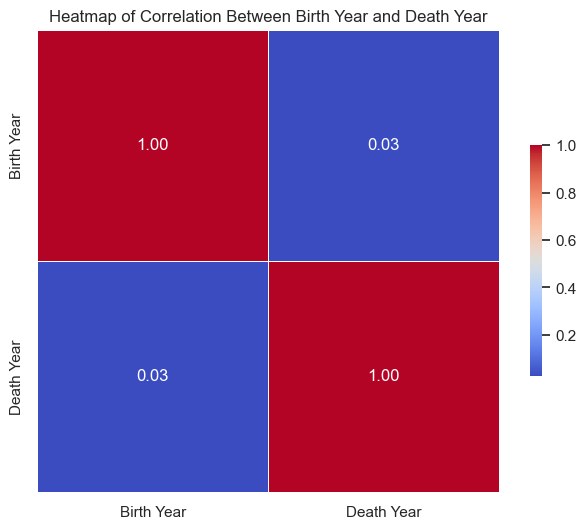

In [90]:
# Set the aesthetic style of the plots
sns.set(style="white")

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': .5}, square=True, linewidths=.5)

# Adding title
plt.title('Heatmap of Correlation Between Birth Year and Death Year')

# Show the plot
plt.show()

In [91]:
birth_pack_counts = df['Birth Pack'].value_counts()

print(birth_pack_counts)

Birth Pack
7     126
0     117
8     102
21     72
20     65
43     63
42     60
2      53
5      51
26     50
24     45
4      39
47     35
28     31
25     31
39     30
27     29
31     26
33     25
1      20
3      20
36     18
46     15
30     14
12     14
58     11
9      10
35      8
11      8
13      8
40      7
10      6
32      6
15      6
34      6
41      5
54      5
56      5
14      4
55      4
18      3
45      3
23      3
38      2
44      2
6       2
37      1
16      1
17      1
48      1
22      1
19      1
Name: count, dtype: int64


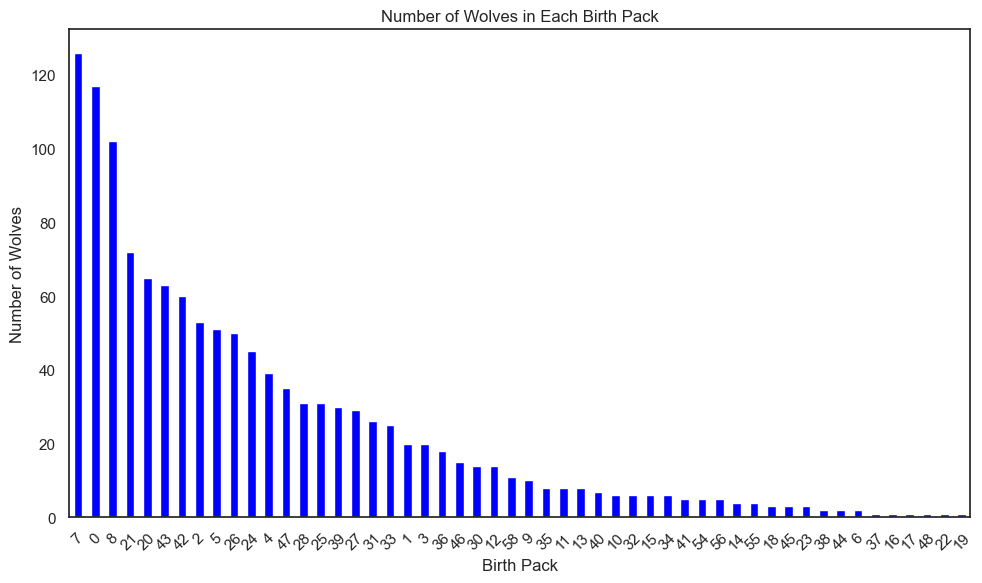

In [92]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
birth_pack_counts.plot(kind='bar', color='Blue')
plt.title('Number of Wolves in Each Birth Pack')
plt.xlabel('Birth Pack')
plt.ylabel('Number of Wolves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

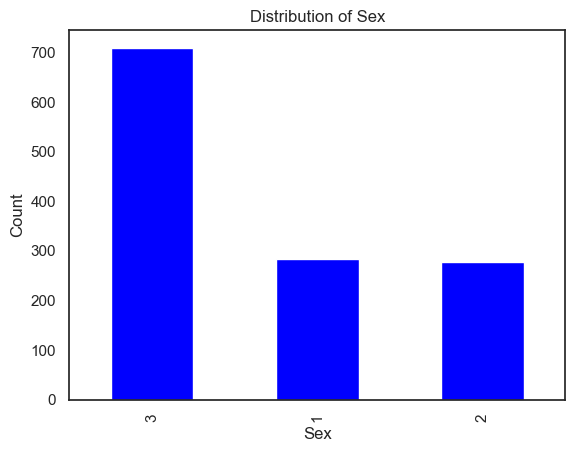

In [93]:
# Plot bar graph for 'Sex'
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

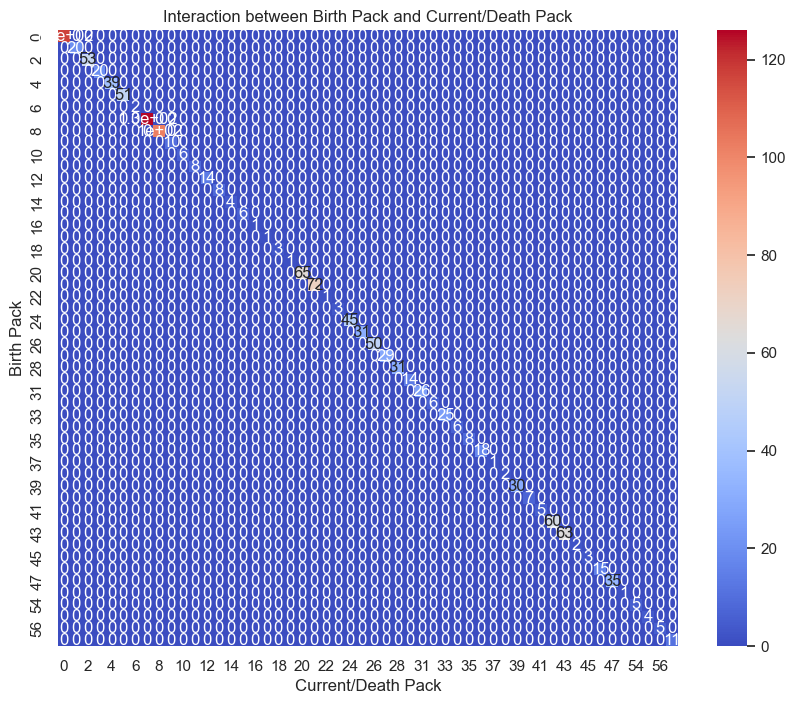

In [94]:
crosstab = pd.crosstab(df['Birth Pack'], df['Current/Death Pack'])

# Plot heat map
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Interaction between Birth Pack and Current/Death Pack')
plt.xlabel('Current/Death Pack')
plt.ylabel('Birth Pack')
plt.show()

In [95]:
crosstab_result = pd.crosstab(df['Sex'], df['Birth Year'])

print(crosstab_result)
plt.show()

Birth Year  0     191   192   193   1204  1986  1990  1991  1992  1993  ...  \
Sex                                                                     ...   
1              0     0     0     0     0     1     0     2     3     1  ...   
2              0     0     0     0     0     0     1     3     3     1  ...   
3              1     1     1     1     1     0     0     0     0     0  ...   

Birth Year  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
Sex                                                                     
1              8     1     8     6     4     2     3     5     3     0  
2              0     5     9     5    10     1     5     4     0     1  
3             17    28    34    30    14    16    25    36     5     0  

[3 rows x 38 columns]


In [96]:
crosstab_extended = pd.crosstab(index=[df['Sex'], df['Birth Year']], columns=df['Current/Death Pack'])

print(crosstab_extended)

Current/Death Pack  0   1   2   3   4   5   6   7   8   9   ...  43  44  45  \
Sex Birth Year                                              ...               
1   1986             0   0   0   1   0   0   0   0   0   0  ...   0   0   0   
    1991             0   1   1   0   0   0   0   0   0   0  ...   0   0   0   
    1992             0   0   0   0   1   0   1   1   0   0  ...   0   0   0   
    1993             0   0   0   1   0   0   0   0   0   0  ...   0   0   0   
    1994             0   4   0   1   0   1   0   0   0   0  ...   0   0   0   
...                 ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..   
3   2016             0   0   0   0   0   0   0   0   0   0  ...   4   0   0   
    2017             0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
    2018             3   0   0   0   0   0   0   0   0   0  ...   0   0   0   
    2019             0   0   0   0   0   0   0   0   0   0  ...   2   0   0   
    2020             0   0   0   0   0   0   0   0  

Text(0, 0.5, 'Population')

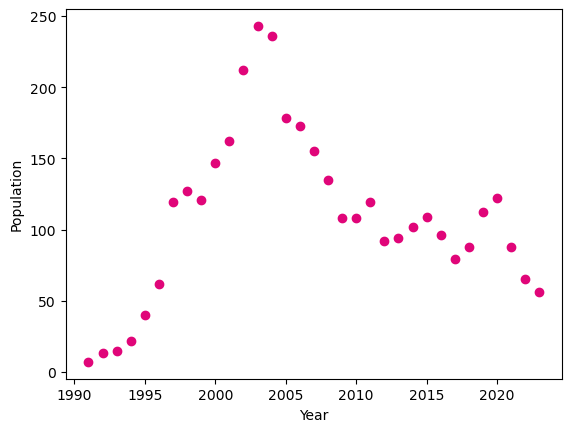

In [71]:
#create x,y series

x_series = pd.Series(years)
y_series = pd.Series(population)


#linear regression

# x and y are 1-D arrays. We need to convert them into 2-D arrays to fit the regression model.
# we first convert series into numpy arrays and use reshape function.

x = x_series.to_numpy().reshape(-1,1)
y = y_series.to_numpy().reshape(-1,1)

#plot scatter plots of train and test data
plt.scatter(x,y, color='#e00579')
plt.xlabel("Year")
plt.ylabel("Population")

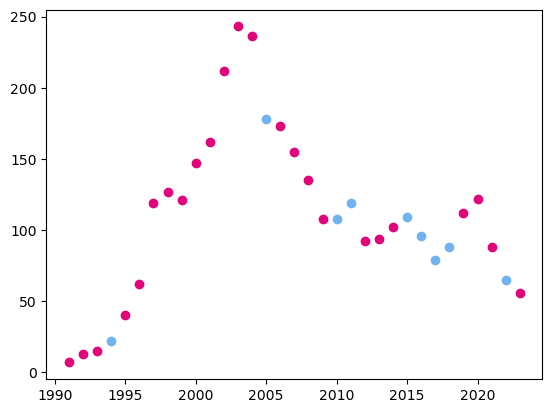

In [72]:
# Train Test split 
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                     train_size = 0.75, 
                                     test_size = 0.25, 
                                     random_state=1)

#plot scatter plots of train and test data
plt.scatter(x_train,y_train, color='#e00579')
plt.scatter(x_test,y_test, color='#71b3ef')

3421.8495980635703
-0.010967048644245025
train score: 0.028386022261161825
test score: -0.424670866439699


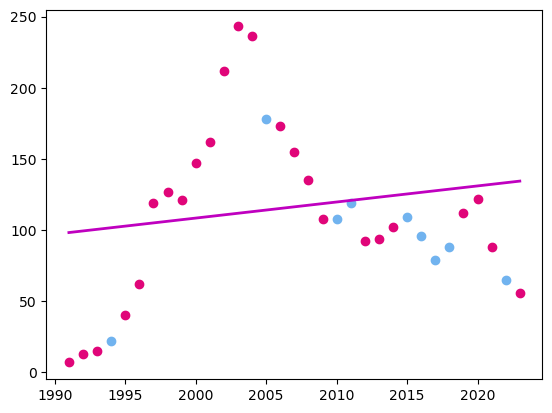

In [73]:
#train model with training data
model_train = LinearRegression()
model_train.fit(x_train,y_train)

y_pred = model_train.predict(x)

#plot scatter plots of train and test data
plt.scatter(x_train,y_train, color='#e00579')
plt.scatter(x_test,y_test, color='#71b3ef')

#plot regression_line 
plt.plot(x,y_pred, color='m', linewidth=2)

#model scores
mse=mean_squared_error(y, y_pred)
print(mse)

r2= r2_score(y, y_pred)
print(r2)

train_score=model_train.score(x_train, y_train)
print("train score:", train_score)

test_score=model_train.score(x_test, y_test)
print("test score:",test_score)

polynomial Degree: 1
MSE: 3421.7870883747846
R2: -0.010948580493096882
train score: 0.028386015943064224
test score: -0.42452713413104637
polynomial Degree: 2
MSE: 3380.9461531491565
R2: 0.0011176540288089232
train score: 0.03963311498182687
test score: -0.4052066468396145
polynomial Degree: 3
MSE: 1515.9297712422044
R2: 0.5521267072486318
train score: 0.593528715783523
test score: 0.20995909247602862
polynomial Degree: 4
MSE: 1046.79823980222
R2: 0.6907290935236539
train score: 0.6970552516171906
test score: 0.6020407611744818
polynomial Degree: 6
MSE: 900.4408836126714
R2: 0.7339695867697786
train score: 0.7245687199410331
test score: 0.756076503739926
polynomial Degree: 8
MSE: 463.62111297802943
R2: 0.8630256372045693
train score: 0.8867320033563937
test score: 0.6851639588184159


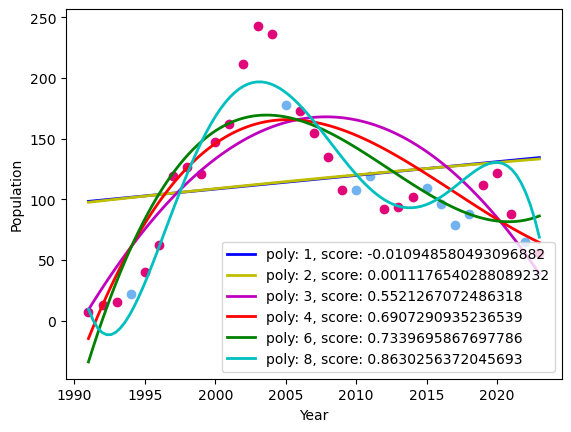

In [74]:
#train polynomial regression models with degrees: 1,2,3,4,6,8

degrees = [1,2,3,4,6,8]
colors=['b','y','m','r','g','c']

#plot scatter plots of train and test data
plt.scatter(x_train,y_train, color='#e00579')
plt.scatter(x_test,y_test, color='#71b3ef')
plt.xlabel("Year")
plt.ylabel("Population")

model_scores=[]
test_scores=[]
train_scores=[]

for i in range(len(degrees)):  
    poly = PolynomialFeatures(degree=degrees[i])
    poly_features = poly.fit_transform(x_train)
    poly_features2 = poly.fit_transform(x)
    poly_features3 = poly.fit_transform(x_test)
    model = Ridge()
    model.fit(poly_features, y_train)
    y_pred = model.predict(poly_features2)
    print("polynomial Degree:",degrees[i])
    
    mse=mean_squared_error(y, y_pred)
    print("MSE:", mse)

    r2= r2_score(y, y_pred)
    print("R2:", r2)
    
    #model scores 
    train_score=model.score(poly_features, y_train)
    print("train score:", train_score)
    test_score=model.score(poly_features3, y_test)
    print("test score:",test_score)

    train_scores.append(train_score)
    test_scores.append(test_score)

    sns.regplot(x=x,y=y_pred,order=degrees[i], scatter=False, line_kws={'color': colors[i], 'linewidth':2}, 
                ci=None, label='poly: '+str(degrees[i])+', score: '+str(r2))
    
plt.legend( loc='lower right')    
plt.show()

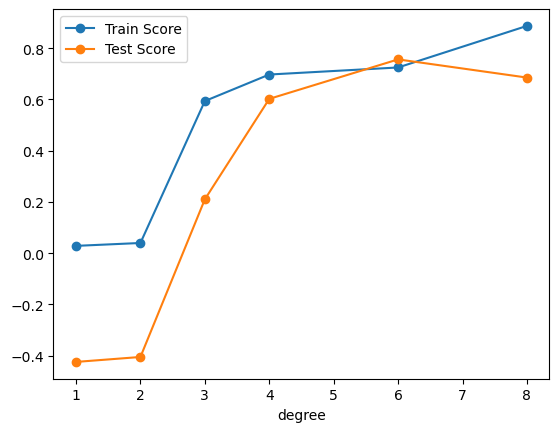

In [75]:
#visualizer for the test and train scores for each polynomial model

plt.plot(degrees, train_scores, '-o', label='Train Score')
plt.plot(degrees, test_scores, '-o', label='Test Score')
plt.xlabel("degree")
plt.legend()

alpha: 1.0 Train Score: 0.88673 Test Score: 0.68516
alpha: 11112.0 Train Score: 0.84769 Test Score: 0.82799
alpha: 22223.0 Train Score: 0.81421 Test Score: 0.816
alpha: 33334.0 Train Score: 0.79529 Test Score: 0.80303
alpha: 44445.0 Train Score: 0.78338 Test Score: 0.79342
alpha: 55556.0 Train Score: 0.77524 Test Score: 0.78627
alpha: 66667.0 Train Score: 0.76933 Test Score: 0.7809
alpha: 77778.0 Train Score: 0.76486 Test Score: 0.77665
alpha: 88889.0 Train Score: 0.76136 Test Score: 0.77331
alpha: 100000.0 Train Score: 0.75853 Test Score: 0.77054


Text(0.5, 1.0, 'Ridge regression model with polynomial degree =8')

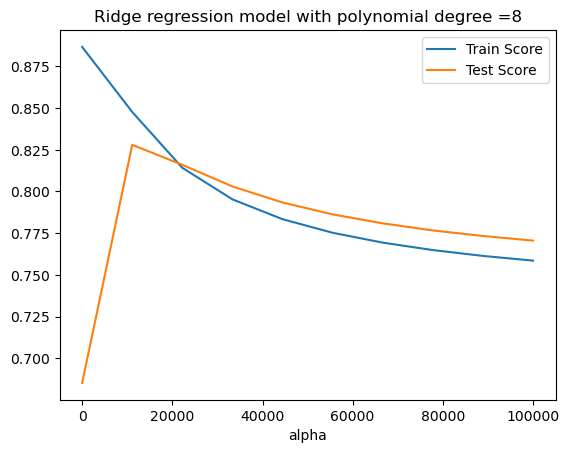

In [76]:
#model scores
train_scores=[]
test_scores=[]

#train model with degree 8

alphas = np.linspace(1,100000,num=10)

for i in alphas:

    poly = PolynomialFeatures(degree=8)
    poly_features = poly.fit_transform(x_train)
    poly_features2 = poly.fit_transform(x)
    poly_features3 = poly.fit_transform(x_test)
    
    model = Ridge(alpha = i)
    model.fit(poly_features, y_train)
    
    y_pred = model.predict(poly_features)
    R2_train= r2_score(y_train, y_pred)

    y_test_pred = model.predict(poly.fit_transform(x_test))
    R2_test= r2_score(y_test, y_test_pred)

    train_scores.append(R2_train)
    test_scores.append(R2_test)
    
    print("alpha:",round(i,1),"Train Score:",round(R2_train,5),"Test Score:",round(R2_test,5))
    
#plot scores for training data and test data acorss alpha values

plt.plot(alphas, train_scores, '-', label='Train Score')
plt.plot(alphas, test_scores, '-', label='Test Score')
plt.xlabel("alpha")
plt.legend()
plt.title("Ridge regression model with polynomial degree =8")

0.8502752336477712
506.77777505172133
train score: 0.8502211795665646
test score: 0.828000663357415


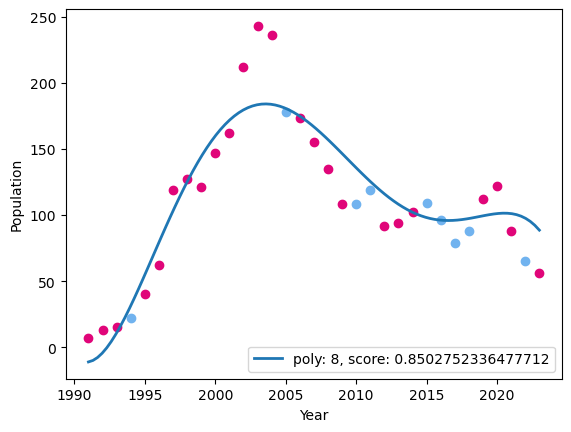

[1.46578045e+11]
[[ 0.00000000e+00  2.88890956e-09  1.69947633e-05 -1.17969495e-03
  -6.31442658e-01  1.00638600e-03 -6.26541559e-07  1.78312627e-10
  -1.94265416e-14]]
[[42.04428101]]


In [77]:
train_scores=[]
test_scores=[]

#plot scatter plots of train and test data
plt.scatter(x_train,y_train, color='#e00579')
plt.scatter(x_test,y_test, color='#71b3ef')
plt.xlabel("Year")
plt.ylabel("Population")

model_scores=[]
d=8

#build the model
  
poly = PolynomialFeatures(degree=d)
poly_features = poly.fit_transform(x_train)
poly_features2 = poly.fit_transform(x)
poly_features3 = poly.fit_transform(x_test)
model = Ridge(alpha=10500) #10517.6
model.fit(poly_features, y_train)
y_pred = model.predict(poly_features2)

r2= r2_score(y, y_pred)
print(r2)

mse=mean_squared_error(y, y_pred)
print(mse)
    
#model scores 
train_score=model.score(poly_features, y_train)
print("train score:", train_score)
test_score=model.score(poly_features3, y_test)
print("test score:",test_score)

train_scores.append(train_score)
test_scores.append(test_score)

sns.regplot(x=x,y=y_pred,order=d, scatter=False, line_kws={'linewidth':2}, 
                ci=None, label='poly: '+str(d)+', score: '+str(r2))
    
plt.legend( loc='lower right')    
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.predict(poly.fit_transform([[2025]])))

In [78]:
#separate data sets of living and deceased wolves
df2 = df[df['Living Status'] != 0]
df = df[df['Living Status'] != 1]
df2

,Sex,Color,Birth Year,Birth Pack,Birth Location,Current/Death Pack,Previous Packs,Death Year,Last seen,Death/Last Month/Day,Death Cause,Death/Last Location,Alt name,Translocated,Living Status
519,1,1,2011,36,"Blacktail Deer Plateau, YNP",36,42,0,2021,Augest,0,Unknown,Patch,0,1
521,2,2,2013,42,"Little America, YNP",42,0,0,2024,Living,Living,Living,0,0,1
544,2,2,2013,21,"Pelican Valley, YNP",21,0,0,2020,February,0,Unknown,0,0,1
551,1,1,2015,46,"Blacktail Deer Plateau, YNP",46,42,0,2021,unknown,0,Unknown,0,0,1
558,1,1,2015,46,"Blacktail Deer Plateau, YNP",46,42,0,2024,Living,Living,Living,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0,1
1392,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0,1
1393,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0,1
1394,3,2,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Gray Pup Rescue Creek,0,1


In [79]:
#recreate the wolf age dictionary for the subset of only deceased wolves

birth_arr = df.iloc[:,2:3].to_numpy()
death_arr = df.iloc[:,7:8].to_numpy()
last_arr = df.iloc[:,8:9].to_numpy()
#if no death year given, use last year seen
for i in range(len(death_arr)):
    if int(death_arr[i]) == 0:
        death_arr[i] = last_arr[i]
wolves = {}
age_arr = []
#for each wolf, assign it the range of years it was alive
for i in range(1271):
    age = death_arr[i] - birth_arr[i]
    age_arr.append(int(age))
    yr_arr = []
    for j in range(int(age)+1):
        yr_arr.append(int(birth_arr[i])+j)
    print(i,": ",yr_arr) #print the dictionary in readable format
    wolves[i] = [yr_arr]
#create the list of years
years = []
for i in range(1991,2024):
    years.append(i)
#based on how many wolves were alive in each year, create the list of populations
population = []
for i in years:
    counter = 0
    for j in wolves:
        if i in wolves[j][0]:
            counter= counter+1
    population.append(counter)
print(age_arr)

0 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
1 :  [1994, 1995, 1996]
2 :  [1991, 1992, 1993, 1994, 1995, 1996]
3 :  [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]
4 :  [1994, 1995, 1996, 1997, 1998]
5 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
6 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000]
7 :  [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
8 :  [1991, 1992, 1993, 1994, 1995]
9 :  [1993, 1994, 1995, 1996]
10 :  [1993, 1994, 1995, 1996]
11 :  [1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997]
12 :  [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]
13 :  [1994, 1995, 1996, 1997]
14 :  [1995, 1996, 1997, 1998, 1999, 2000]
15 :  [1995, 1996, 1997]
16 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]
17 :  [1995, 1996, 1997]
18 :  [1995, 1996]
19 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]
20 :  [1995]
21 :  [1995, 1996, 1997, 1998]
22 :  [1995, 1996, 1997, 199

In [80]:
d1 = df["Sex"].array
d2 = df["Birth Pack"].array
d3 = df["Current/Death Pack"].array
dx = []
dy = age_arr
for i in range(1271):
    entry = []
    entry.append(d1[i])
    entry.append(d2[i])
    entry.append(d3[i])
    dx.append(entry)

X_train, X_test, y_train, y_test = train_test_split(dx, dy, test_size = 0.05,random_state=1)

# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(dx, dy)

DecisionTreeRegressor(random_state=0)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#use GridSearchCV for optimization

tree_para = {'criterion':['gini','entropy','absolute error','squared error'],'max_depth':np.arange(5,20)}
new_reg = GridSearchCV(DecisionTreeClassifier(), tree_para)
new_reg.fit(dx, dy)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'absolute error',
                                       'squared error'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [82]:
#the scores of the original model without hyperparameter tuning
y_pred = regressor.predict(X_test)

data1 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data1

#model scores 
train_score=regressor.score(X_train, y_train)
print("train score:", train_score)

test_score=regressor.score(X_test, y_test)
print("test score:",test_score)

train score: 0.5894165659320666
test score: 0.6397745352922379


In [83]:
#the scores of the new model
y_pred = new_reg.predict(X_test)

data2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data2

#model scores 
train_score=new_reg.score(X_train, y_train)
print("train score:", train_score)

test_score=new_reg.score(X_test, y_test)
print("test score:",test_score)

train score: 0.6677713338856669
test score: 0.65625


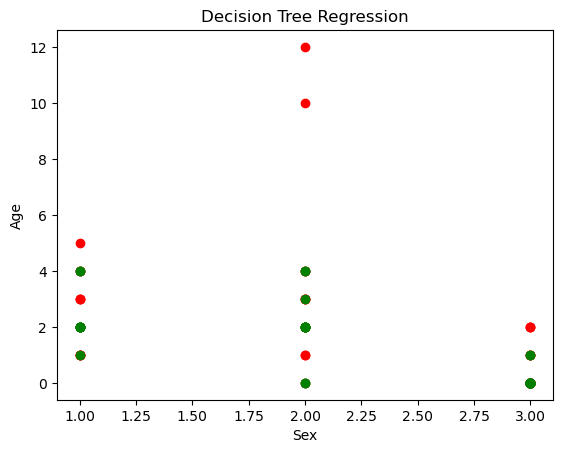

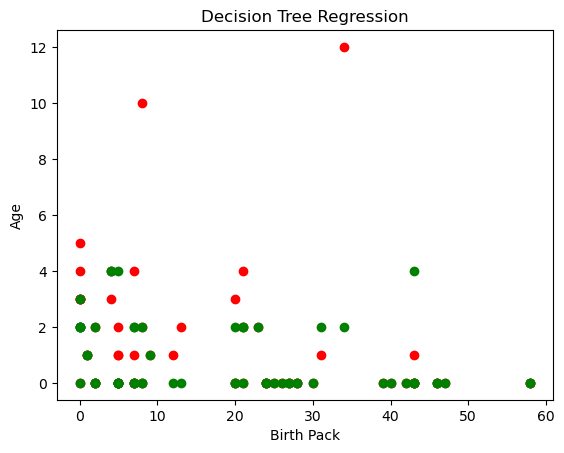

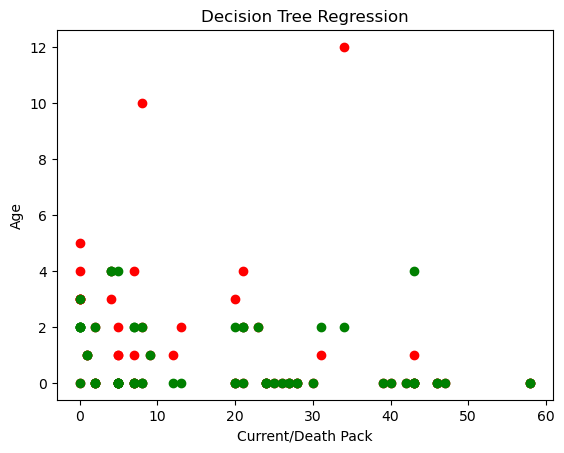

In [84]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(0, 15, 1)
X_grid = X_grid.reshape((len(X_grid), 1))
sex_test = []
for i in range(len(X_test)):
    sex_test.append(X_test[i][0])
plt.scatter(sex_test, y_test, color = 'red')
plt.scatter(sex_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

birth_test = []
for i in range(len(X_test)):
    birth_test.append(X_test[i][1])
plt.scatter(birth_test, y_test, color = 'red')
plt.scatter(birth_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Birth Pack')
plt.ylabel('Age')
plt.show()

last_test = []
for i in range(len(X_test)):
    last_test.append(X_test[i][2])
plt.scatter(last_test, y_test, color = 'red')
plt.scatter(last_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Current/Death Pack')
plt.ylabel('Age')
plt.show()


In [85]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(new_reg.best_estimator_, out_file ='tree.dot', 
               feature_names =['Sex','Birth Pack','Current/Death Pack'])

In [86]:
#predict the life expectancy for the remaining living wolves

d1 = df2["Sex"].array
d2 = df2["Birth Pack"].array
d3 = df2["Current/Death Pack"].array
dx2 = []
dy = age_arr
for i in range(125):
    entry = []
    entry.append(d1[i])
    entry.append(d2[i])
    entry.append(d3[i])
    dx2.append(entry)
ans = new_reg.predict(dx2) 
for i in range(len(ans)):
    print (i," [",d1[i],", ",d2[i],", ",d3[i],"]: ",ans[i])  

0  [ 1 ,  36 ,  36 ]:  2
1  [ 2 ,  42 ,  42 ]:  0
2  [ 2 ,  21 ,  21 ]:  2
3  [ 1 ,  46 ,  46 ]:  2
4  [ 1 ,  46 ,  46 ]:  2
5  [ 2 ,  24 ,  24 ]:  2
6  [ 1 ,  24 ,  24 ]:  2
7  [ 2 ,  21 ,  21 ]:  2
8  [ 2 ,  47 ,  47 ]:  0
9  [ 1 ,  47 ,  47 ]:  0
10  [ 1 ,  24 ,  24 ]:  2
11  [ 2 ,  47 ,  47 ]:  0
12  [ 2 ,  24 ,  24 ]:  2
13  [ 2 ,  42 ,  42 ]:  0
14  [ 1 ,  43 ,  43 ]:  4
15  [ 1 ,  43 ,  43 ]:  4
16  [ 2 ,  47 ,  47 ]:  0
17  [ 1 ,  0 ,  0 ]:  2
18  [ 2 ,  21 ,  21 ]:  2
19  [ 1 ,  47 ,  47 ]:  0
20  [ 2 ,  47 ,  47 ]:  0
21  [ 1 ,  43 ,  43 ]:  4
22  [ 1 ,  43 ,  43 ]:  4
23  [ 2 ,  43 ,  43 ]:  4
24  [ 1 ,  42 ,  42 ]:  0
25  [ 1 ,  42 ,  42 ]:  0
26  [ 1 ,  42 ,  42 ]:  0
27  [ 2 ,  42 ,  42 ]:  0
28  [ 1 ,  42 ,  42 ]:  0
29  [ 1 ,  48 ,  48 ]:  0
30  [ 1 ,  47 ,  47 ]:  0
31  [ 2 ,  43 ,  43 ]:  4
32  [ 2 ,  43 ,  43 ]:  4
33  [ 1 ,  47 ,  47 ]:  0
34  [ 2 ,  47 ,  47 ]:  0
35  [ 2 ,  47 ,  47 ]:  0
36  [ 1 ,  47 ,  47 ]:  0
37  [ 2 ,  21 ,  21 ]:  2
38  [ 1 ,  42 ,  42 ]:  